---
# 1. Import Data

Import Dataset from local computer. Before it, we need to import packages as following :

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle

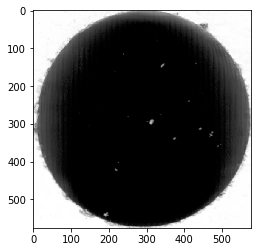

In [14]:
# Import the Data
# ---------------

DATADIR = "D:/images3/1_27.11.2017" # We try to import data in first folder "D:/images3/1_27.11.2017"
CATEGORIES = ["Green", "Red","Yellow"]

for category in CATEGORIES:  # do "Green", "Red", "Yellow"
    path = os.path.join(DATADIR, category)  # create path to "Green", "Red", "Yellow"
    for img in os.listdir(path):  # iterate over each image per "Green", "Red", "Yellow"
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # convert to array and use grayscale
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one image for now so break
    break  #... and one more!

In [15]:
# print array for the first image
print(img_array)

[[255 255 255 ... 253 252 252]
 [255 255 255 ... 253 252 252]
 [255 255 255 ... 253 252 252]
 ...
 [255 255 255 ... 254 253 251]
 [254 254 254 ... 254 254 253]
 [254 254 254 ... 254 254 253]]


In [16]:
# print shape for the first image
print(img_array.shape)

(576, 577)


So that's a 576 tall, 577 wide, and 3-channel image. 3-channel is because it's RGB (color). But in this case, we use gray color, so it only has 1-channel image. We definitely don't want the images that big, but also various images are different shapes, and this is also a problem. So we will convert all image in the same shapes (pixels = 170) :

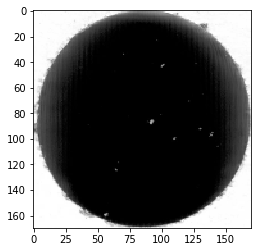

In [17]:
IMG_SIZE = 170

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [18]:
print(new_array.shape)

(170, 170)


Better. Let's try that. Next, we're going to want to create our full data and first we should set our training data and testing data from full data. 

Now, we want to begin building our full data!

In [167]:
full_data = []

def create_data(DATADIR,CATEGORIES):
    for category in CATEGORIES:  # do "Green", "Red", "Yellow"

        path = os.path.join(DATADIR,category)  # create path to "Green", "Red", "Yellow"
        class_num = CATEGORIES.index(category)  # get the classification  (0, 1 or 2). 0="Green", 1="Red", and 2="Yellow"

        for img in tqdm(os.listdir(path)):  # iterate over each image per "Green", "Red", "Yellow"
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                full_data.append([new_array, class_num])  # add this to our full_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))


DATADIR1_5 = ["D:/images3/1_27.11.2017","D:/images3/2_12.04.2019","D:/images3/3_21.05.2019",
              "D:/images3/4_31.05.2019","D:/images3/5_04.06.2019"]
for i in DATADIR1_5:
    create_data(i,CATEGORIES) #Call function

100%|██████████| 560/560 [00:07<00:00, 79.19it/s]


In [168]:
print(len(full_data)) #the number of our data

8526


Total our data is **8526 images**. Let's save this data, so that we don't need to keep calculating it every time we want to play with the neural network model:

In [169]:
# save data
pickle_out = open("full_data.pickle","wb")
pickle.dump(full_data, pickle_out)
pickle_out.close()

# 2. Shuffle Data

In [69]:
# load data
pickle_in = open("full_data.pickle","rb")
mydata = pickle.load(pickle_in)

In [70]:
import random

random.shuffle(mydata) #shuffle data

In [71]:
import random
for sample in mydata[:10]:
    print(sample[1])

2
0
0
0
2
0
1
0
0
2


Great, we've got the classes nicely mixed in! Time to next step!

# 3. Split Data into Training and Testing Data

In [72]:
X = []
Y = []

for features,label in mydata:
    X.append(features)
    Y.append(label)

We know that our data is **unbalanced**. But in this case we don't want to deal with that.

In [73]:
print("Total number of Green", Y.count(0))
print("Total number of Red", Y.count(1))
print("Total number of Yellow", Y.count(2))

Total number of Green 3780
Total number of Red 1946
Total number of Yellow 2800


Split training and testing data:

In [74]:
from sklearn.model_selection import train_test_split

training, testing = train_test_split(
    mydata,               # Dataset
    train_size = 0.90,    # Proportion of training data 90% and testing data 10%
    stratify = Y,         # Stratified Sampling
)

C:\Users\Rauzan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [75]:
print("the number of training data", len(training))
print("the number of testing data", len(testing))

the number of training data 7673
the number of testing data 853


In [76]:
X_training = []
Y_training = []
X_testing = []
Y_testing = []

for features,label in training:
    X_training.append(features)
    Y_training.append(label)
for features,label in testing:
    X_testing.append(features)
    Y_testing.append(label)

# 4. Pre Processing Data

In [77]:
#Reshape training and testing data
X_training = np.array(X_training).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_testing = np.array(X_testing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [78]:
from tensorflow.keras.utils import to_categorical

#Change to float datatype
X_training = X_training.astype('float32')
X_testing = X_testing.astype('float32')

# Scale the data to lie between 0 to 1
X_training /= 255
X_testing /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(Y_training)
test_labels_one_hot = to_categorical(Y_testing)

# Try to display the change for category label using one-hot encoding
print('Original label for the first images : ',Y_training[0])
print('After conversion to categorical (one-hot) :', train_labels_one_hot[0])

Original label for the first images :  0
After conversion to categorical (one-hot) : [1. 0. 0.]


# 5. Build CNN Model

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, ZeroPadding2D, AveragePooling2D 

# Define the Model
# -----------------

def CreateModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape =(170,170,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(ZeroPadding2D(padding=(2, 2)))
    #model.add(Dropout(0.25))

    model.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(ZeroPadding2D(padding=(2, 2)))
    #model.add(Dropout(0.25))

    model.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(ZeroPadding2D(padding=(2, 2)))
    #model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Dense(3, activation='softmax'))   
    return model

In [80]:
# Configure the Model
# -------------------

model = CreateModel()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 166, 166, 32)      832       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 83, 83, 32)        0         
_________________________________________________________________
zero_padding2d_6 (ZeroPaddin (None, 87, 87, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 83, 83, 32)        25632     
_________________________________________________________________
average_pooling2d_4 (Average (None, 41, 41, 32)        0         
_________________________________________________________________
zero_padding2d_7 (ZeroPaddin (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 41, 41, 32)        25632     
__________

Base on the summary model, we can estimate **642,051 Total params**. That is a lot, right ?!

# 6. Training Model

In [82]:
history = model.fit(X_training, train_labels_one_hot, batch_size=32, epochs=10, verbose=1,
                   validation_data=(X_testing, test_labels_one_hot))

Train on 7673 samples, validate on 853 samples
Epoch 1/10
7673/7673 [==============================] - 1403s 183ms/step - loss: 0.8650 - acc: 0.5747 - val_loss: 0.7473 - val_acc: 0.6354
Epoch 2/10
7673/7673 [==============================] - 1414s 184ms/step - loss: 0.7637 - acc: 0.6399 - val_loss: 0.7351 - val_acc: 0.6518
Epoch 3/10
7673/7673 [==============================] - 1432s 187ms/step - loss: 0.7293 - acc: 0.6587 - val_loss: 0.7076 - val_acc: 0.6565
Epoch 4/10
7673/7673 [==============================] - 1382s 180ms/step - loss: 0.7030 - acc: 0.6695 - val_loss: 0.6813 - val_acc: 0.6858
Epoch 5/10
7673/7673 [==============================] - 1385s 181ms/step - loss: 0.6812 - acc: 0.6837 - val_loss: 0.6807 - val_acc: 0.6928
Epoch 6/10
7673/7673 [==============================] - 1388s 181ms/step - loss: 0.6643 - acc: 0.6982 - val_loss: 0.6957 - val_acc: 0.6882
Epoch 7/10
7673/7673 [==============================] - 1358s 177ms/step - loss: 0.6521 - acc: 0.7096 - val_loss: 0.682

Based on Epoch 10/10, we can see that loss value and accuracy of training data are **0.5895** and **0.7347** respectively. **It takes so much time to train the model**, because I use my local computer. We cannot satisfy with that, so maybe next step in the future we can use cloud computing such google colab platform.

# 7. Evaluate Model

Text(0.5,1,'Accuracy Curves')

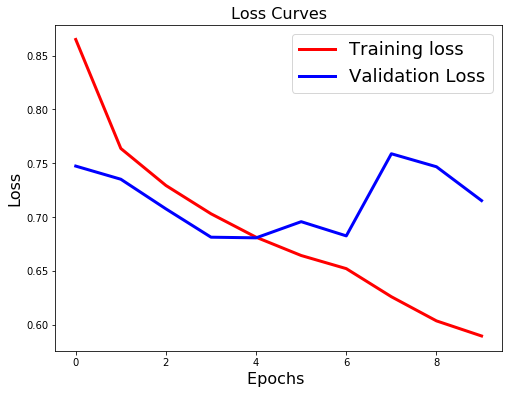

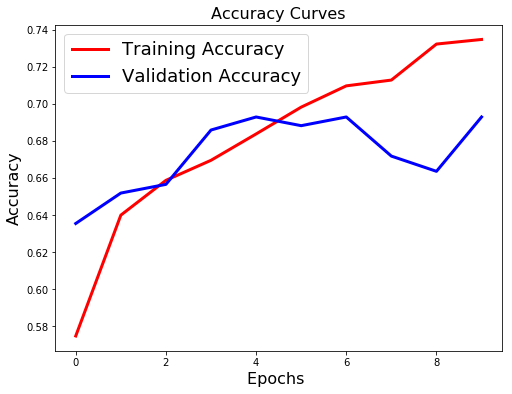

In [83]:
# Checkout the Loss and Accuracy Curves
# -------------------------------------

# Plot the Loss Curves
plt.figure(figsize=[8, 6])
plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

# Plot the Accuracy Curves
plt.figure(figsize=[8, 6])
plt.plot(history.history['acc'], 'r', linewidth=3.0)
plt.plot(history.history['val_acc'], 'b', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)


In [101]:
# Evaluate the Model
# --------------------------
model.evaluate(X_testing, test_labels_one_hot) # loss and accuracy of testing data

853/853 [==============================] - 35s 41ms/step


[0.7152654539099332, 0.6928487695395458]

and also we can see that loss value and accuracy of testing data are **0.715265** and **0.6928487** respectively.

In [114]:
#Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

test_predict_class = model.predict_classes(X_testing)
confusion_matrix(Y_testing, test_predict_class, labels=[0,1,2]) # 0="Green", 1="Red", and 2="Yellow"

array([[302,   8,  68],
       [  9, 111,  75],
       [ 42,  60, 178]], dtype=int64)

And here is Confusion Matrix that we have. it is little bit simple, so we will plot it to get more interesting :

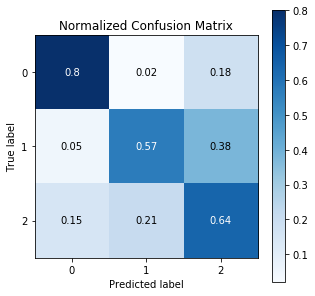

In [117]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    Y_testing, test_predict_class,
    figsize=(5,5), normalize=True)

wonderfull !, here we have normalized confusion matrix, with **"0="Green", 1="Red", and 2="Yellow"**.